<a href="https://colab.research.google.com/github/Samyakpaul108/Porter-analysis/blob/main/Porter%20Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import time
from datetime import datetime

In [ ]:
data = pd.read_csv("ola_driver.csv")

In [ ]:
data.drop("Unnamed: 0", axis = 1, inplace = True)

##Define the structure of the dataset

In [ ]:
#Structure of the dataset is defined here
data.shape

(19104, 13)

##Define the datatypes of each column

In [ ]:
#Datatypes of each column is defined here
print(data.dtypes)


MMM-YY                   object
Driver_ID                 int64
Age                     float64
Gender                  float64
City                     object
Education_Level           int64
Income                    int64
Dateofjoining            object
LastWorkingDate          object
Joining Designation       int64
Grade                     int64
Total Business Value      int64
Quarterly Rating          int64
dtype: object


##Find the columns with missing values


In [ ]:
#The columns with missing values
missing_values=data.isnull().sum()
print(missing_values)

MMM-YY                      0
Driver_ID                   0
Age                        61
Gender                     52
City                        0
Education_Level             0
Income                      0
Dateofjoining               0
LastWorkingDate         17488
Joining Designation         0
Grade                       0
Total Business Value        0
Quarterly Rating            0
dtype: int64


##Find the basic statistics such as men, median and standard deviation of some columns such as Age, Income, Total Business Value and Quarterly rating

In [ ]:
#Here the mean, median, and standard deviation of Age, income,total business value and Quarterly rating is calculated
numerical_features = data[['Age', 'Income', 'Total Business Value', 'Quarterly Rating']]

base_stat = numerical_features.describe().T[['mean', '50%', 'std']]
base_stat.rename(columns={'50%': 'median'}, inplace=True)

print(base_stat)


                               mean    median           std
Age                       34.668435      34.0  6.257912e+00
Income                 65652.025126   60087.0  3.091452e+04
Total Business Value  571662.074958  250000.0  1.128312e+06
Quarterly Rating           2.008899       2.0  1.009832e+00


##Find the unique drivers in the dataset

In [ ]:
#The unique drivers are determined here
unique_drivers=data['Driver_ID'].nunique()
print(unique_drivers)

2381


##Drivers joined and left each month

In [ ]:
#Datatype of "dateofjoining" column and "Lastworkingday" columns are formatted here
data["MMM-YY"] = pd.to_datetime(data["MMM-YY"])
data["Dateofjoining"] = pd.to_datetime(data["Dateofjoining"])
data["LastWorkingDate"] = pd.to_datetime(data["LastWorkingDate"])

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19104 entries, 0 to 19103
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   MMM-YY                19104 non-null  datetime64[ns]
 1   Driver_ID             19104 non-null  int64         
 2   Age                   19043 non-null  float64       
 3   Gender                19052 non-null  float64       
 4   City                  19104 non-null  object        
 5   Education_Level       19104 non-null  int64         
 6   Income                19104 non-null  int64         
 7   Dateofjoining         19104 non-null  datetime64[ns]
 8   LastWorkingDate       1616 non-null   datetime64[ns]
 9   Joining Designation   19104 non-null  int64         
 10  Grade                 19104 non-null  int64         
 11  Total Business Value  19104 non-null  int64         
 12  Quarterly Rating      19104 non-null  int64         
 13  Join            

In [ ]:
#"Dateofjoining" and"LastworkingDate" are converted here to period of month for ease of calculation

data['Join'] = data['Dateofjoining'].dt.to_period('M')
data['Leave'] = data['LastWorkingDate'].dt.to_period('M')

In [ ]:
#Calculation of drivers joined and left is done here
monthly_counts = data.groupby('Join').size().reindex(pd.period_range(start=data['Join'].min(),
                                                                               end=data['Join'].max(),
                                                                               freq='M'), fill_value=0).rename('Drivers_Joined')

monthly_leaves = data.groupby('Leave').size().reindex(pd.period_range(start=data['Leave'].min(),
                                                                                 end=data['Leave'].max(),
                                                                                 freq='M'), fill_value=0).rename('Drivers_Left')

In [ ]:
result = pd.concat([monthly_counts, monthly_leaves], axis=1).fillna(0).astype(int)

print(result)

         Drivers_Joined  Drivers_Left
2013-04              31             0
2013-05              24             0
2013-06              59             0
2013-07              63             0
2013-08              33             0
...                 ...           ...
2020-08             325             4
2020-09             314            66
2020-10             139            62
2020-11              93            73
2020-12              59            60

[93 rows x 2 columns]


#Determine the average tenure of drivers in the dataset

In [ ]:
#"Dateofjoining" and"LastworkingDate" are converted here to period of day-month-year for ease of calculation
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'], format='%d-%m-%Y',errors='coerce')
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'], format='%d-%m-%Y',errors='coerce')


In [ ]:
#Tenure days are calculated here using timestampnow for the drivers still working
data['Tenure_Days'] = (data['LastWorkingDate'].fillna(pd.Timestamp.now()) - data['Dateofjoining']).dt.days

In [ ]:
#Average tenure days is calculated here
average_tenure = data['Tenure_Days'].mean()

In [ ]:
print(average_tenure)

2190.3563128140704


##Create a target variable to indicate whether a driver has left the company based on Last Working Date

In [ ]:
#A column is created here as left_company which can indicate whether the driver has left the company or not
#If left_company ie equals to 0, then the driver is still working else he left the company and the value will be 1 in the row
data['left_company'] = data['LastWorkingDate'].notna().astype(int)

count = data['left_company'].value_counts()
print(count)

left_company
0    17488
1     1616
Name: count, dtype: int64


In [ ]:
data.head(5)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Join,Leave,Tenure_Days,left_company
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,2381060,2,2018-12,NaT,2098,0
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,NaT,1,1,-665480,2,2018-12,NaT,2098,0
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11,1,1,0,2,2018-12,2019-03,77,1
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020-11,NaT,1415,0
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,NaT,2,2,0,1,2020-11,NaT,1415,0


##Additional features can we extract from Date of joining

In [ ]:
#dateofjoining is calculated here and the format is changed
data['Dateofjoining'] = pd.to_datetime(data['Dateofjoining'], format='%d-%m-%Y',errors='coerce')
#LastWorkingDate is calculated here and the format is changed
data['LastWorkingDate'] = pd.to_datetime(data['LastWorkingDate'], format='%d-%m-%Y',errors='coerce')

In [ ]:
#duration of employment is calculated here in days
data['Tenure_Days'] = (data['LastWorkingDate'].fillna(pd.Timestamp.now()) - data['Dateofjoining']).dt.days
data['Tenure_Days']

,Tenure_Days
0,2098
1,2098
2,77
3,1415
4,1415
...,...
19099,1566
19100,1566
19101,1566
19102,1566


In [ ]:
#current_date is calculated here using Timestamp
current_date = pd.Timestamp.now()

In [ ]:
#duration of employment is calculated in months
data['Tenure_Months'] = ((current_date.year - data['Dateofjoining'].dt.year) * 12 + current_date.month - data['Dateofjoining'].dt.month)
data['Tenure_Months']

,Tenure_Months
0,69
1,69
2,69
3,46
4,46
...,...
19099,51
19100,51
19101,51
19102,51


In [ ]:
#duration of employment is calculated in years
data['Tenure_Years'] = data['Tenure_Days'] / 365
data['Tenure_Years']

,Tenure_Years
0,5.747945
1,5.747945
2,0.210959
3,3.876712
4,3.876712
...,...
19099,4.290411
19100,4.290411
19101,4.290411
19102,4.290411


##Distributions of Age, Income, and Total Business Value

In [ ]:
# Checking for outliers
print(data[['Age', 'Income', 'Total Business Value']].describe())

                Age         Income  Total Business Value
count  19043.000000   19104.000000          1.910400e+04
mean      34.668435   65652.025126          5.716621e+05
std        6.257912   30914.515344          1.128312e+06
min       21.000000   10747.000000         -6.000000e+06
25%       30.000000   42383.000000          0.000000e+00
50%       34.000000   60087.000000          2.500000e+05
75%       39.000000   83969.000000          6.997000e+05
max       58.000000  188418.000000          3.374772e+07


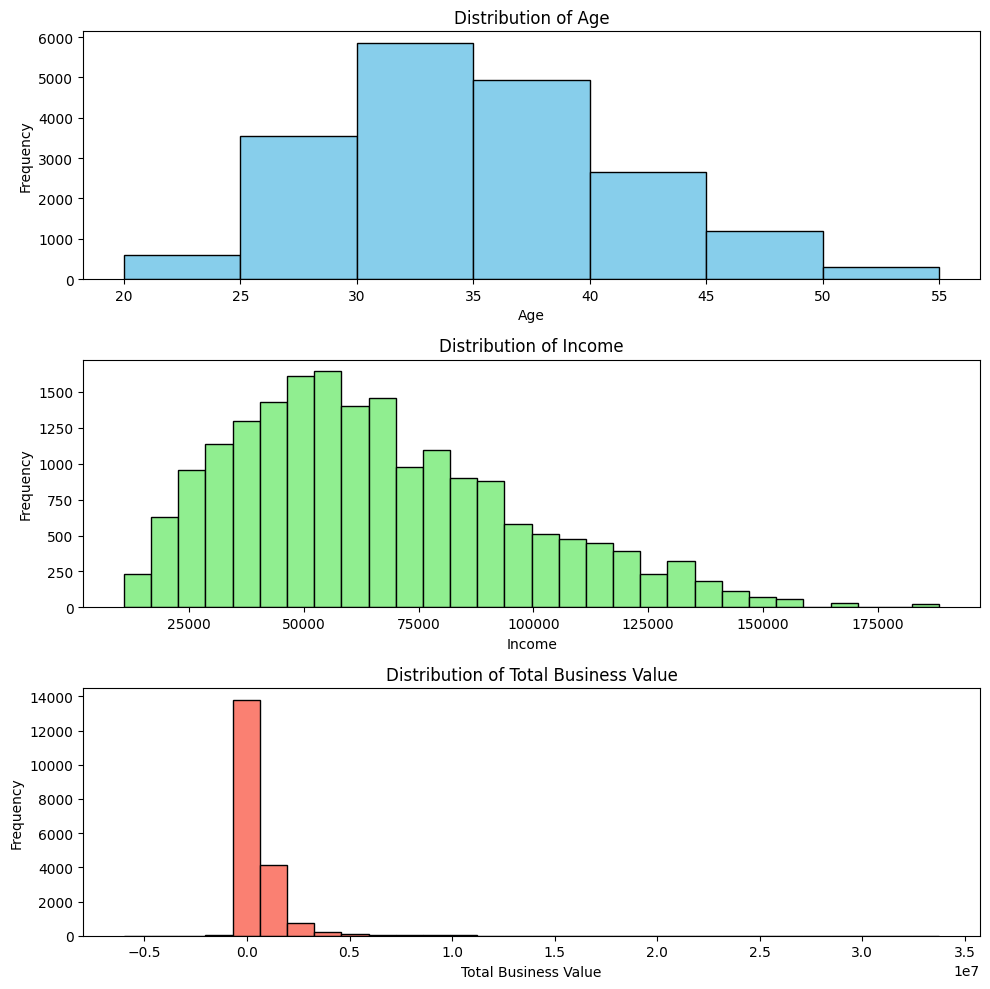

In [ ]:
# Plot histograms is used for Age, Income, and Total Business Value
fig, axs = plt.subplots(3, 1, figsize=(10, 10))

# Histogram for Age
axs[0].hist(data['Age'].dropna(), bins=range(20, 60, 5), color='skyblue', edgecolor='black')
axs[0].set_title('Distribution of Age')
axs[0].set_xlabel('Age')
axs[0].set_ylabel('Frequency')

# Histogram for Income
axs[1].hist(data['Income'].dropna(), bins=30, color='lightgreen', edgecolor='black')
axs[1].set_title('Distribution of Income')
axs[1].set_xlabel('Income')
axs[1].set_ylabel('Frequency')

# Histogram for Total Business Value
axs[2].hist(data['Total Business Value'].dropna(), bins=30, color='salmon', edgecolor='black')
axs[2].set_title('Distribution of Total Business Value')
axs[2].set_xlabel('Total Business Value')
axs[2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()

## Determine Quarterly Rating vary across different drivers and time periods

In [ ]:
#Quarterly rating is determined here
data['Quarterly Rating']=data['Quarterly Rating'].astype('int')

In [ ]:
#Data is aggregated by driver and sorted in ascending order
rating_by_driver = data.groupby('Driver_ID')['Quarterly Rating'].mean().reset_index()
rating_by_driver = rating_by_driver.sort_values(by='Quarterly Rating', ascending=False)


<ipython-input-57-c498bf117782>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Driver_ID', y='Quarterly Rating', data=rating_by_driver, palette='viridis')


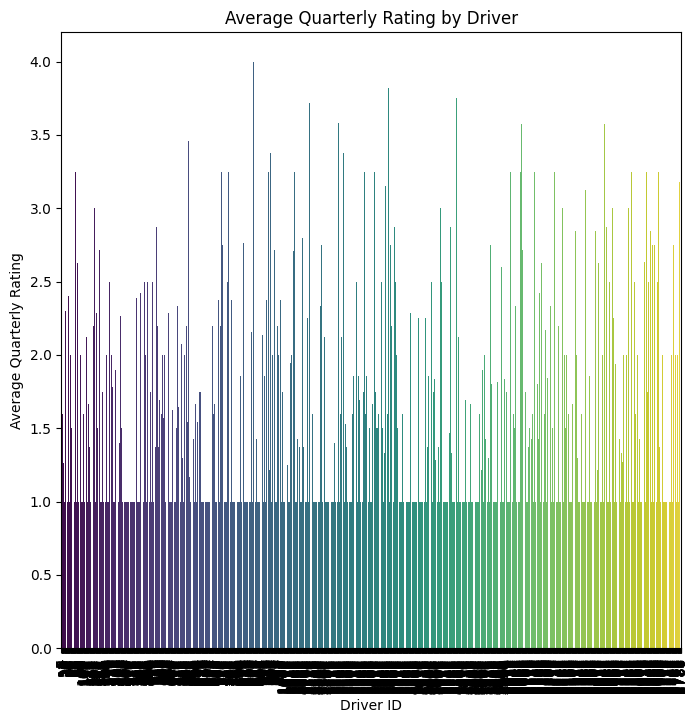

In [ ]:
# Average Quarterly Rating is plotted by Driver_ID
plt.figure(figsize=(8, 8))
sns.barplot(x='Driver_ID', y='Quarterly Rating', data=rating_by_driver, palette='viridis')
plt.title('Average Quarterly Rating by Driver')
plt.xlabel('Driver ID')
plt.ylabel('Average Quarterly Rating')
plt.xticks(rotation=90)
plt.show()

In [ ]:
# Average Quarterly Rating is aggregated by year and month
data['YearMonth'] = data['MMM-YY'].dt.to_period('M')
rating_by_month = data.groupby('YearMonth')['Quarterly Rating'].mean().reset_index()
print(rating_by_month)

   YearMonth  Quarterly Rating
0    2019-01          1.943249
1    2019-02          2.021186
2    2019-03          2.098851
3    2019-04          1.968514
4    2019-05          2.015707
5    2019-06          2.063361
6    2019-07          2.054161
7    2019-08          2.064987
8    2019-09          2.041995
9    2019-10          2.048714
10   2019-11          1.992318
11   2019-12          1.950943
12   2020-01          1.966752
13   2020-02          2.009198
14   2020-03          2.075104
15   2020-04          1.989026
16   2020-05          1.950392
17   2020-06          1.935065
18   2020-07          2.019851
19   2020-08          2.014778
20   2020-09          1.998764
21   2020-10          2.006112
22   2020-11          2.017391
23   2020-12          1.989011


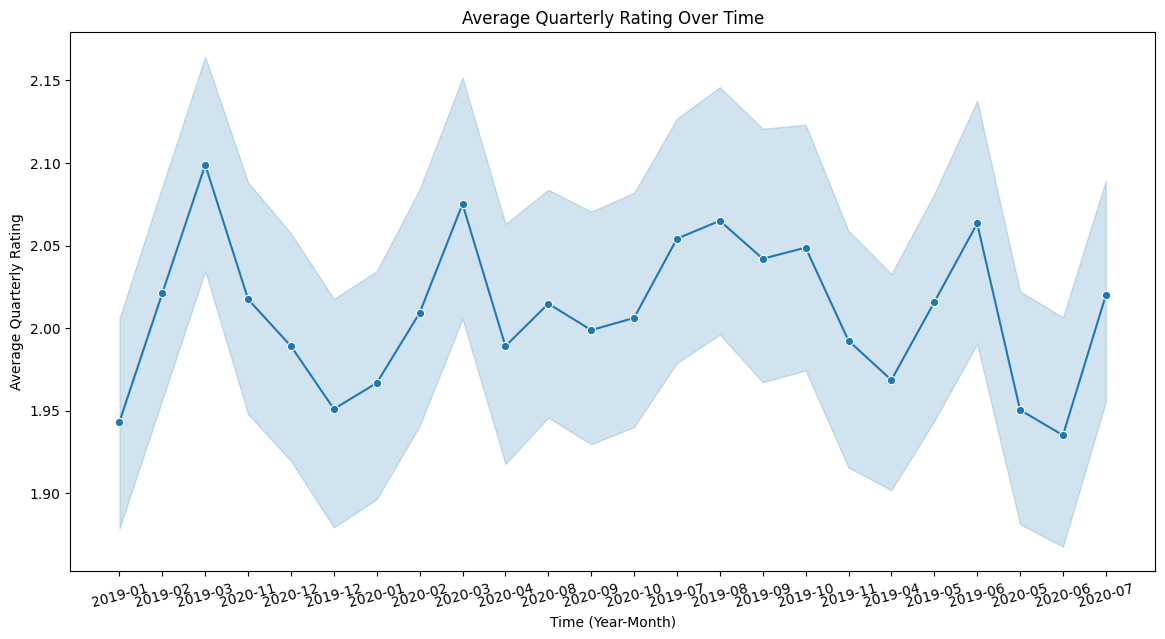

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(x=data['YearMonth'].astype(str), y='Quarterly Rating', data=data, marker='o')
plt.title("Average Quarterly Rating Over Time")
plt.xlabel("Time (Year-Month)")
plt.ylabel("Average Quarterly Rating")
plt.xticks(rotation=15)
plt.show()

##Patterns in the monthly income or business value acquired

In [ ]:
#'Income' and 'Total Business Value' is converted to numeric
data['Income'] = pd.to_numeric(data['Income'], errors='coerce')
data['Total Business Value'] = pd.to_numeric(data['Total Business Value'], errors='coerce')

# Total income and business value is aggregated by YearMonth
monthly_income = data.groupby('YearMonth')['Income'].sum().reset_index()
monthly_business_value = data.groupby('YearMonth')['Total Business Value'].sum().reset_index()

#'YearMonth' is converted to string for plotting
monthly_income['YearMonth'] = monthly_income['YearMonth'].astype(str)
monthly_business_value['YearMonth'] = monthly_business_value['YearMonth'].astype(str)

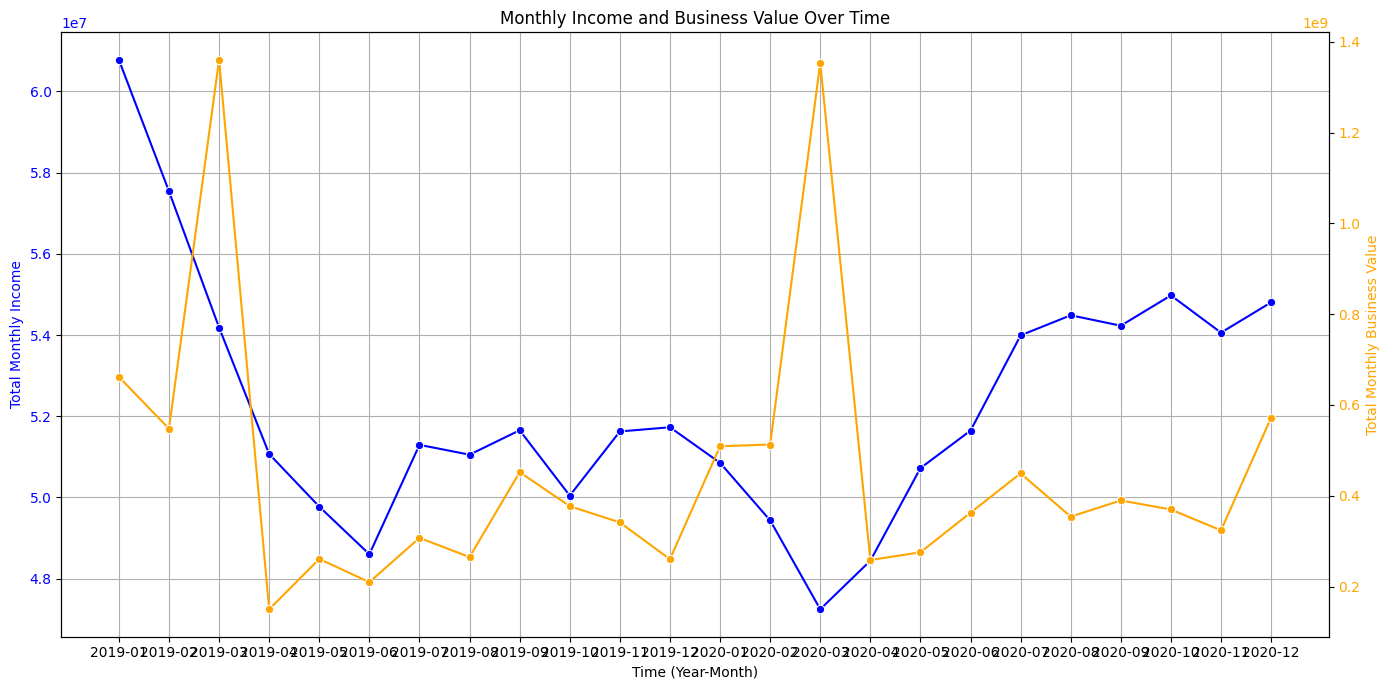

In [ ]:
# visualize the trend/pattern
fig, ax1 = plt.subplots(figsize=(14, 7))
sns.lineplot(x='YearMonth', y='Income', data=monthly_income, marker='o', color='b', ax=ax1)
ax1.set_xlabel('Time (Year-Month)')
ax1.set_ylabel('Total Monthly Income', color='b')
ax1.tick_params(axis='y', labelcolor='b')
ax1.set_title('Monthly Income and Business Value Over Time')
ax1.grid(True)
ax2 = ax1.twinx()
sns.lineplot(x='YearMonth', y='Total Business Value', data=monthly_business_value, marker='o', color='orange', ax=ax2)
ax2.set_ylabel('Total Monthly Business Value', color='orange')
ax2.tick_params(axis='y', labelcolor='orange')
plt.tight_layout()
plt.show()

##Handling missing values in LastWorkingDate

In [ ]:
# Missing LastWorkingDate is replaced with 'Still Working'
data['LastWorkingDate'].fillna('Still Working', inplace=True)


<ipython-input-63-3c8f19a7b1ae>:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value 'Still Working' has dtype incompatible with datetime64[ns], please explicitly cast to a compatible dtype first.
  data['LastWorkingDate'].fillna('Still Working', inplace=True)


In [ ]:
data.head(5)

,MMM-YY,Driver_ID,Age,Gender,City,Education_Level,Income,Dateofjoining,LastWorkingDate,Joining Designation,Grade,Total Business Value,Quarterly Rating,Join,Leave,Tenure_Days,left_company,Tenure_Months,Tenure_Years,YearMonth
0,2019-01-01,1,28.0,0.0,C23,2,57387,2018-12-24,Still Working,1,1,2381060,2,2018-12,NaT,2098,0,69,5.747945,2019-01
1,2019-02-01,1,28.0,0.0,C23,2,57387,2018-12-24,Still Working,1,1,-665480,2,2018-12,NaT,2098,0,69,5.747945,2019-02
2,2019-03-01,1,28.0,0.0,C23,2,57387,2018-12-24,2019-03-11 00:00:00,1,1,0,2,2018-12,2019-03,77,1,69,0.210959,2019-03
3,2020-11-01,2,31.0,0.0,C7,2,67016,2020-11-06,Still Working,2,2,0,1,2020-11,NaT,1415,0,46,3.876712,2020-11
4,2020-12-01,2,31.0,0.0,C7,2,67016,2020-11-06,Still Working,2,2,0,1,2020-11,NaT,1415,0,46,3.876712,2020-12


##Correlation between Age and Income

In [ ]:
# The correlation is calculated here between Age and Income
correlation = data[['Age', 'Income']].corr().loc['Age', 'Income']
print(f"Correlation between Age and Income: {correlation}")

Correlation between Age and Income: 0.1911117742178919


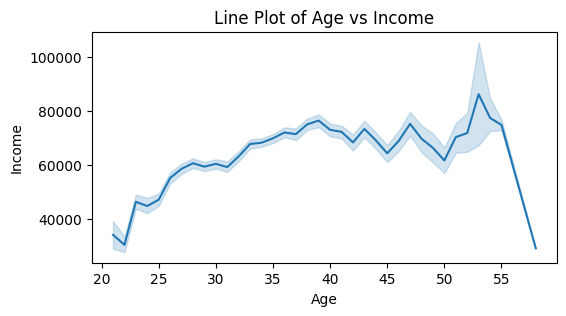

In [ ]:
# Visualizing the relationship
plt.figure(figsize=(6, 3))
sns.lineplot(x='Age', y='Income', data=data)
plt.title('Line Plot of Age vs Income')
plt.xlabel('Age')
plt.ylabel('Income')
plt.show()

##Affect of Education_Level and City on Total Business Value

In [ ]:
#The data type is ensured here for education level and city
data['Education_Level'] = data['Education_Level'].astype('int')
data['City'] = data['City'].astype('str')

In [ ]:
#Calculating Total Business Value grouped by Education_Level and City
education = data.groupby('Education_Level')['Total Business Value'].describe()
print(education)

city = data.groupby('City')['Total Business Value'].describe()
print(city)

                  count           mean           std        min  25%  \
Education_Level                                                        
0                5913.0  565410.657872  1.092937e+06 -2628700.0  0.0   
1                6864.0  601287.867133  1.227469e+06 -5483890.0  0.0   
2                6327.0  545364.175755  1.044904e+06 -6000000.0  0.0   

                      50%       75%         max  
Education_Level                                  
0                239180.0  689660.0  23550000.0  
1                270885.0  721917.5  33747720.0  
2                246450.0  676765.0  17651940.0  
       count           mean           std        min  25%       50%       75%  \
City                                                                            
C1     677.0  531560.280650  1.028461e+06  -442150.0  0.0  263930.0  602580.0   
C10    744.0  540753.736559  9.124536e+05  -500000.0  0.0  251815.0  676185.0   
C11    468.0  538549.145299  1.099731e+06  -439300.0  0.0  203935

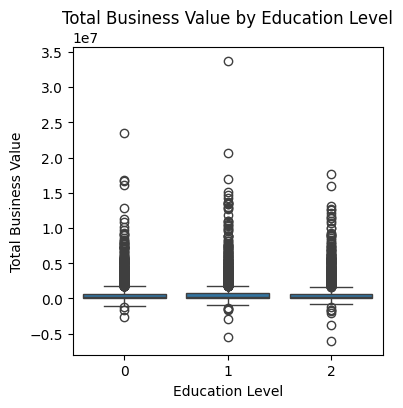

In [ ]:
#visualizing with boxplot of total Business Value across different Education_Level categories
plt.figure(figsize=(4, 4))
sns.boxplot(x='Education_Level', y='Total Business Value', data=data)
plt.title('Total Business Value by Education Level')
plt.xlabel('Education Level')
plt.ylabel('Total Business Value')
plt.show()

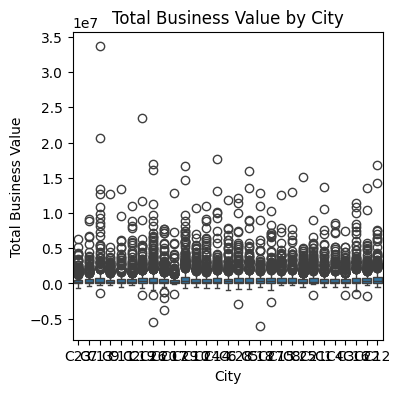

In [ ]:
##visualizing with boxplot of total Business Value across different citi
plt.figure(figsize=(4, 4))
sns.boxplot(x='City', y='Total Business Value', data=data)
plt.title('Total Business Value by City')
plt.xlabel('City')
plt.ylabel('Total Business Value')
plt.show()

##Relation between tenure days and quarterly rating

In [ ]:
# Correlation coefficient is calculated here
correlation = data[['Quarterly Rating', 'Tenure_Days']].corr().iloc[0, 1]
print(correlation)

0.3659813080076492


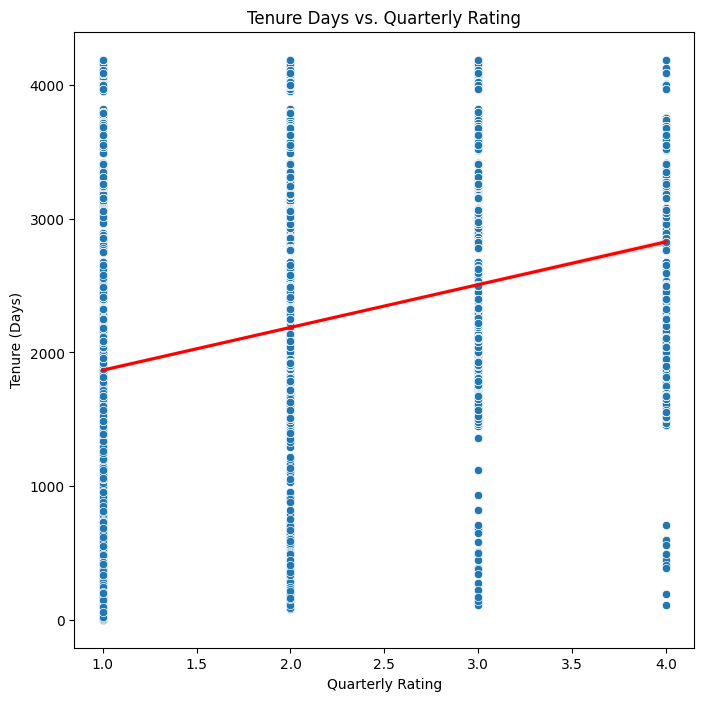

In [ ]:
# Data visualization with scatter plot with regression line
plt.figure(figsize=(8, 8))
sns.scatterplot(x='Quarterly Rating', y='Tenure_Days', data=data)
sns.regplot(x='Quarterly Rating', y='Tenure_Days', data=data, scatter=False, color='red')
plt.title('Tenure Days vs. Quarterly Rating')
plt.xlabel('Quarterly Rating')
plt.ylabel('Tenure (Days)')
plt.show()

##Strategies Ola can implement to improve driver retention?

##key factors influencing driver attrition.

In [ ]:


#A column is created here to indicate attrition (1 for left, 0 for active)
data['Attrition'] = data['LastWorkingDate'].notnull().astype(int)

summary =data.groupby('Attrition')[['Age', 'Income', 'Tenure_Years']].agg(['mean', 'median', 'std'])

print(summary)




                 Age                         Income                         \
                mean median       std          mean   median           std   
Attrition                                                                    
0          34.789353   34.0  6.267636  66600.170631  61291.0  31087.696453   
1          33.360025   33.0  5.999647  55391.400990  51630.0  26924.959518   

          Tenure_Years                      
                  mean    median       std  
Attrition                                   
0             6.464978  6.079452  1.928523  
1             0.979654  0.482192  1.249075  


In [ ]:
# Analysis for Gender is done here
gender_crosstab = pd.crosstab(data['Gender'], data['Attrition'], margins=True)
print(gender_crosstab)



Attrition      0     1    All
Gender                       
0.0        10130   944  11074
1.0         7311   667   7978
All        17441  1611  19052


In [ ]:
# Analysis for City is done here
city_crosstab = pd.crosstab(data['City'], data['Attrition'], margins=True)
print(city_crosstab.head(5))

Attrition    0   1  All
City                   
C1         621  56  677
C10        683  61  744
C11        423  45  468
C12        674  53  727
C13        511  58  569


##Insights from the analysis and recommendation for retention of the drivers
Insights from Attrition Analysis
Income Levels:

Insight: Higher incomes correlate with lower attrition rates.

Recommendation: Review and adjust compensation packages to ensure they are competitive and introduce performance-based incentives.

Age Demographics:

Insight: Younger drivers showed higher attrition, indicating a potential desire for growth and flexibility.

Recommendation: Implement targeted career development programs and flexible scheduling options to meet the needs of younger drivers.

Tenure and Experience:

Insight: Longer-tenured drivers are less likely to leave.


Recommendation: Create clear pathways for advancement to retain newer drivers and encourage them to invest in their roles.


City and Gender:

Insight: Higher attrition rates were observed among specific gender groups and cities with lower average incomes.

Recommendation: Tailor compensation packages based on city-specific economic conditions and ensure equity across gender to foster fairness and retain talent.


##Are there specific demographic groups or performance metrics that require targeted interventions?


In [ ]:
#First we are dividing data on some demographics such as age and genders
#then we will calculate mean, median and standard deviation of performance metrics such as business value or quarterly rating each of demographies

In [ ]:
#First we will see performance metrics based on certain age groups
#we will create some age group first
#and then create a new column as age_category

bins = [20, 30, 40, 50, 60, 70]
labels = ['20-30', '31-40', '41-50', '51-60', '61-70']
data['age_category'] = pd.cut(data['Age'], bins=bins, labels=labels, right=False)

In [ ]:
# Now Grouping by Age Category and calculate mean, median, and standard deviation
age_category_stats = data.groupby('age_category').agg({
    'Quarterly Rating': ['mean', 'median', 'std'],
    'Total Business Value': ['mean', 'median', 'std']
}).reset_index()


age_category_stats.columns = ['age_category',
                              'Quarterly_Rating_Mean', 'Quarterly_Rating_Median', 'Quarterly_Rating_STD',
                              'Total_Business_Value_Mean', 'Total_Business_Value_Median', 'Total_Business_Value_STD']

<ipython-input-114-187410b7a2ee>:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_category_stats = data.groupby('age_category').agg({


In [ ]:
print(age_category_stats)

  age_category  Quarterly_Rating_Mean  Quarterly_Rating_Median  \
0        20-30               1.860802                      2.0   
1        31-40               1.958604                      2.0   
2        41-50               2.268649                      2.0   
3        51-60               2.599327                      3.0   
4        61-70                    NaN                      NaN   

   Quarterly_Rating_STD  Total_Business_Value_Mean  \
0              1.022567              438698.576607   
1              0.986474              563524.839428   
2              0.994807              718242.636933   
3              1.064348              874987.811448   
4                   NaN                        NaN   

   Total_Business_Value_Median  Total_Business_Value_STD  
0                     146660.0              9.686194e+05  
1                     241540.0              1.151725e+06  
2                     406550.0              1.193199e+06  
3                     515160.0            

##Summary of Targeted Interventions by Age Group

Key Observations:

Younger Drivers (20-30): If they show lower average ratings and business values, consider:
Interventions: Training programs and mentorship to enhance skills.

Middle-Aged Drivers (31-50): If performance is consistent:
Interventions: Retention strategies like incentives and recognition.

Older Drivers (51-70): If they perform well but have high variability:
Interventions: Individualized coaching and health support.

In [ ]:
#First we will see performance metrics based on certain gender groups

In [ ]:
gender_stats = data.groupby('Gender').agg({
    'Quarterly Rating': ['mean', 'median', 'std'],
    'Total Business Value': ['mean', 'median', 'std']
}).reset_index()

gender_stats.columns = ['Gender',
                        'Quarterly_Rating_Mean', 'Quarterly_Rating_Median', 'Quarterly_Rating_STD',
                        'Total_Business_Value_Mean', 'Total_Business_Value_Median', 'Total_Business_Value_STD']
print(gender_stats)

   Gender  Quarterly_Rating_Mean  Quarterly_Rating_Median  \
0     0.0               2.002348                      2.0   
1     1.0               2.018927                      2.0   

   Quarterly_Rating_STD  Total_Business_Value_Mean  \
0              1.009927              563818.063031   
1              1.010050              584213.954625   

   Total_Business_Value_Median  Total_Business_Value_STD  
0                     244365.0              1.108184e+06  
1                     256950.0              1.158531e+06  


##Summary of Targeted Interventions by Age Group
Key Findings:

Male Drivers: May show higher average ratings and business values.

Consideration for Interventions: Ensure support and resources are equally available to female drivers to promote fairness.

Female Drivers: If performance metrics are lower, targeted support is necessary.

Need for Interventions: Mentorship programs and training to enhance skills and confidence.